<br></br>
<b><h2> Loading Python Libraries </h2></b>

In [60]:
# Let's import the required python packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inlines

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [2]:
!pip install missingno

<br></br>
<b><h2> Loading the Dataset </h2></b>

In [3]:
# Let's load the Health insurance data into a dataframe using pandas
data_frame = pd.read_csv("diabetes_data.csv")

# Let's take a quick look at the shape of the dataframe
print("diabetes Data -->", data_frame.shape)
print()

# Let's take a brief look at the contents of the dataframe
data_frame.head(10)

diabetes Data --> (70692, 18)



,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


<br></br>
<h2><b> Gaining Insights from Data </b></h2>

In [4]:
# Let's obtain a brief overview of the dataframe
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [5]:
# Let's see descriptive statistics for all numeric columns
data_frame.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


<b><h3>Observations</h3></b>
1. <b> The majority of people in the dataset have an age that is centered or focused around 55</b>
2. <b> "Gender" column is not continuous and has two distinct categories: "Male" and "Female" The number of occurrences for each category is "13029" and "13029" respectively.
2. <b> The values in the Driving_License column are less spread out or less dispersed from the mean </b> 
3. <b> Datapoints in Annual_Premium coulmn are more spread out or widely dispersed from the mean (average) of the values.</b>
4. <b> The Annual_Premium readings are clustered or concentrated around the value of 30000. </b>

In [6]:
# # Let's see descriptive statistics for all object columns
# data_frame.describe(include= 'Object')

In [6]:
# Function to get unique_counts based on specific column
def value_counts(column_name):
    return data_frame.loc[:, column_name].value_counts()  # Returns the unique value counts

In [7]:
value_counts("Diabetes")

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [8]:
# Iterates over all the columns of the dataframe and calls value_counts func
required_columns = [
    "Age",
    "Sex",
    "HighChol",
    "CholCheck",
    "BMI",
    "Smoker",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "GenHlth",
    "MentHlth",
    "PhysHlth",
    "DiffWalk",
    "Stroke",
    "HighBP",
    "Diabetes"
]
for column_name in required_columns:
    print(f"Value Counts of {column_name}", sep="\n")
    print(value_counts(column_name=column_name))
    print()

Value Counts of Age
10.0    10856
9.0     10112
8.0      8603
11.0     8044
7.0      6872
13.0     5426
12.0     5394
6.0      4648
5.0      3520
4.0      2793
3.0      2049
2.0      1396
1.0       979
Name: Age, dtype: int64

Value Counts of Sex
0.0    38386
1.0    32306
Name: Sex, dtype: int64

Value Counts of HighChol
1.0    37163
0.0    33529
Name: HighChol, dtype: int64

Value Counts of CholCheck
1.0    68943
0.0     1749
Name: CholCheck, dtype: int64

Value Counts of BMI
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64

Value Counts of Smoker
0.0    37094
1.0    33598
Name: Smoker, dtype: int64

Value Counts of HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: HeartDiseaseorAttack, dtype: int64

Value Counts of PhysActivity
1.0    49699
0.0    20993
Name: PhysActivity, dtype: int64

Value Counts of Fruits
1.0    43249
0.0    27443
Name: Fruits, dtyp

<br></br>
### See how many missing data points we have

In [9]:
data_frame.dropna(inplace = True)

In [10]:
# Let's get the number of missing data points per column
data_frame.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

<br></br>
### Missing data points visualization

<AxesSubplot:>

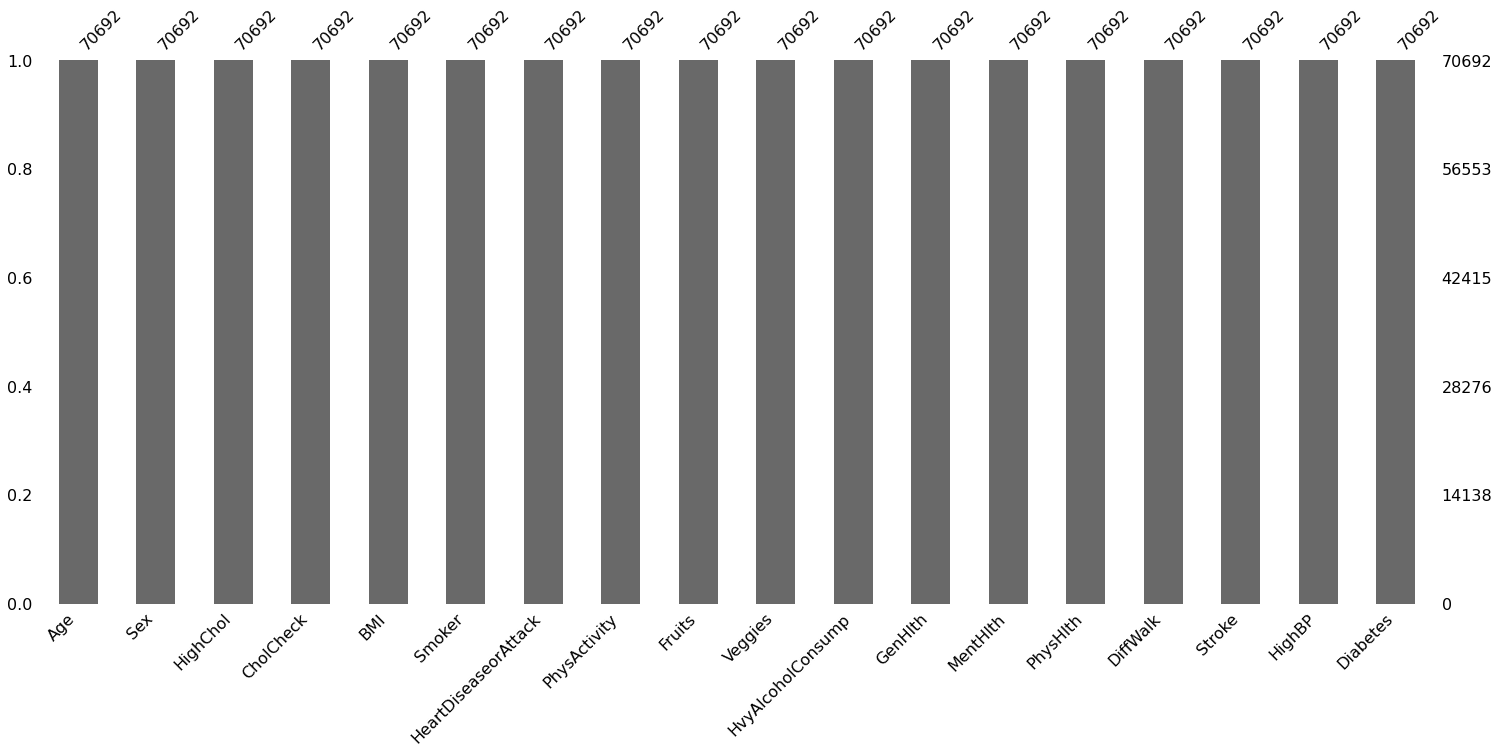

In [11]:
# Let's visualize the missing points using barplot
msno.bar(data_frame)

<br></br>
<h2><b> Feature Engineering </b></h2>

In [12]:
numerical_columns = data_frame.select_dtypes(exclude=["object"]).columns.tolist()

categorical_columns = data_frame.select_dtypes(include=["object"]).columns.tolist()

### Frequency Encoding

In [14]:
# Function to to convert categorical data into numerical values
# based on the frequency of each category in the dataset


# def frequency_encoding(categorical_series):
#     # Get's the value counts of distinct labels present in categorical_series
#     counts = categorical_series.value_counts()
#     # Computes and returns the frequency encoding values
#     return categorical_series.map(counts) / len(categorical_series)

### Conversion of categorical features into numerical features

In [15]:
# # Let's remove the date column from dataframe as it is of no use for the model to learn
# data_frame.drop(["id"], axis=1, inplace=True)
# numerical_columns.remove("id")
# # Iterates over all the categorical columns and applies one-hot encoding to each column
# for categorical_column in categorical_columns:
#     if categorical_column == "Gender":
#         data_frame[categorical_column] = data_frame.loc[:, categorical_column].map(
#             {"Male": 1, "Female": 0}
#         )
#     elif categorical_column == "Vehicle_Age":
#         data_frame[categorical_column] = data_frame.loc[:, categorical_column].map(
#             {"1-2 Year": 0, "< 1 Year": 1, "> 2 Years": 2}
#         )
#     elif categorical_column == "Vehicle_Damage":
#         data_frame[categorical_column] = data_frame.loc[:, categorical_column].map(
#             {"Yes": 1, "No": 0}
#         )

#### Let's see if any column dtype is of "Object"

In [13]:
# Let's see the data types of all the columns after conversion to numerical features
data_frame.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

<br></br>
<b><h2> Data Normalization </h2></b>

In [14]:
# Function to normalize the values of each column by subtracting
# the mean and dividing by the standard deviation


def z_score_normalization(column_name):
    series = data_frame.loc[:, column_name]
    return (series - series.mean()) / series.std()

In [15]:
# Iterates over all the continuous columns and applies z_score_normalization to each column
for column_name in numerical_columns:
    if column_name != "Diabetes":
        data_frame[column_name] = z_score_normalization(column_name=column_name)

#### Descriptive statisctics after normalization

In [16]:
# Let's see descriptive statistics for all numeric columns after normalization
data_frame.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,7.069200e+04,70692.000000
mean,6.007541e-14,8.995429e-15,-1.408051e-15,5.032454e-14,2.307358e-14,3.271681e-16,2.821757e-14,-3.577896e-14,-4.051421e-14,1.098500e-14,-6.929687e-14,4.832450e-14,4.314058e-15,1.283204e-14,-1.520552e-13,9.442164e-14,2.625057e-14,0.500000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500004
min,-2.659063e+00,-9.173860e-01,-1.052791e+00,-6.278373e+00,-2.510135e+00,-9.517038e-01,-4.164674e-01,-1.538628e+00,-1.255363e+00,-1.932410e+00,-2.112496e-01,-1.649731e+00,-4.600550e-01,-5.774465e-01,-5.815496e-01,-2.574717e-01,-1.136096e+00,0.000000
25%,-5.553891e-01,-9.173860e-01,-1.052791e+00,1.592747e-01,-6.827406e-01,-9.517038e-01,-4.164674e-01,-1.538628e+00,-1.255363e+00,5.174812e-01,-2.112496e-01,-7.517140e-01,-4.600550e-01,-5.774465e-01,-5.815496e-01,-2.574717e-01,-1.136096e+00,0.000000
50%,1.458355e-01,-9.173860e-01,9.498430e-01,1.592747e-01,-1.204654e-01,-9.517038e-01,-4.164674e-01,6.499207e-01,7.965714e-01,5.174812e-01,-2.112496e-01,1.463032e-01,-4.600550e-01,-5.774465e-01,-5.815496e-01,-2.574717e-01,8.801949e-01,0.500000
75%,8.470601e-01,1.090038e+00,9.498430e-01,1.592747e-01,4.418098e-01,1.050732e+00,-4.164674e-01,6.499207e-01,7.965714e-01,5.174812e-01,-2.112496e-01,1.044320e+00,-2.148256e-01,1.884099e-02,1.719520e+00,-2.574717e-01,8.801949e-01,1.000000
max,1.548285e+00,1.090038e+00,9.498430e-01,1.592747e-01,9.578782e+00,1.050732e+00,2.401114e+00,6.499207e-01,7.965714e-01,5.174812e-01,4.733670e+00,1.942337e+00,3.218387e+00,2.403991e+00,1.719520e+00,3.883868e+00,8.801949e-01,1.000000


#### Distributions

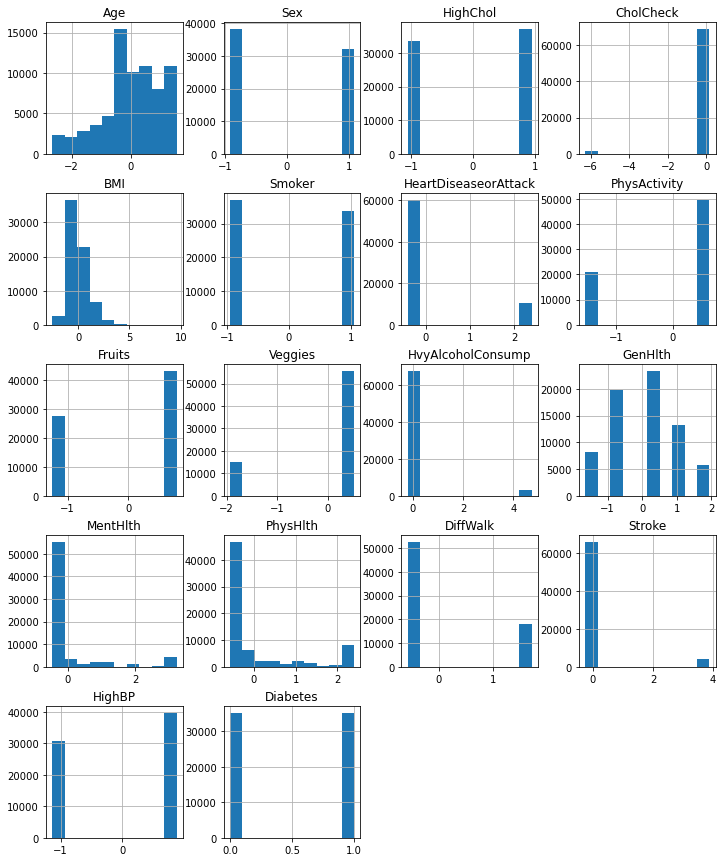

In [17]:
# # Let's confirm that all values in a dataframe are within the range of 0 to 1 using boxplots


data_frame.hist(figsize=(12,15))
plt.show()
    

# Let's remove empty subplot
# figure.delaxes(axis[nrow_plots - 1][ncol_plots - 1])

<br></br>
<h2><b>Output Column Distribution</b></h2>

In [18]:
# Let's see the percentage of 0's and 1's in output column(RainTomorrow)
percentage = data_frame.loc[:, "Diabetes"].value_counts(normalize=True) * 100
percentage

0.0    50.0
1.0    50.0
Name: Diabetes, dtype: float64

#### Pie chart distribution of RainTomorrow label

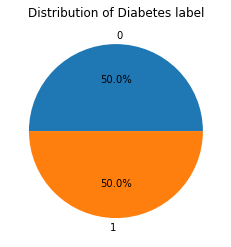

In [19]:
plt.pie(percentage, labels=["0", "1"], autopct="%1.1f%%")
plt.title("Distribution of Diabetes label")
plt.show()

<br></br>
## Phase - 2 Build a model to overfit the entire dataset)

#### Model Building

In [20]:
x_data = data_frame.iloc[:, :-1].values
y_data =data_frame.iloc[:, -1].values

y_data.shape

(70692,)

In [21]:
# Let's create a keras sequential model
model = Sequential()

# Let's add dense layer to the model network
model.add(Dense(1, input_dim=data_frame.shape[1] - 1, activation="relu"))
# model.add(Dense(8, activation = "relu"))
# model.add(Dense(1, activation = "sigmoid"))

#### Model Compilation

In [22]:
# Let's build the model using binary_crossentropy as the loss function 
# and accuracy as the evaluation metric during the compilation process

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#### Model Training

In [23]:
# Let's fit the sequential model with input features and output label
history = model.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 4s 1ms/step - loss: 4.9329 - accuracy: 0.5812
Epoch 2/100
2210/2210 [==============================] - 3s 1ms/step - loss: 4.4388 - accuracy: 0.6159
Epoch 3/100
2210/2210 [==============================] - 3s 1ms/step - loss: 3.6539 - accuracy: 0.6697
Epoch 4/100
2210/2210 [==============================] - 3s 1ms/step - loss: 2.9923 - accuracy: 0.7062
Epoch 5/100
2210/2210 [==============================] - 3s 1ms/step - loss: 2.5038 - accuracy: 0.7206
Epoch 6/100
2210/2210 [==============================] - 3s 1ms/step - loss: 1.6544 - accuracy: 0.7261
Epoch 7/100
2210/2210 [==============================] - 3s 1ms/step - loss: 1.2826 - accuracy: 0.7238
Epoch 8/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.8837 - accuracy: 0.7210
Epoch 9/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.6319 - accuracy: 0.7349
Epoch 10/100
2210/2210 [==============================] - 3s 1ms/step - l

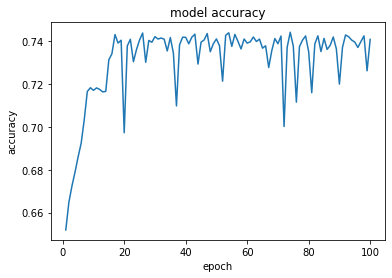

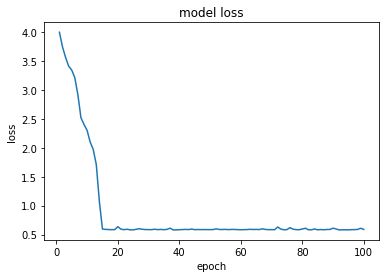

In [31]:
x=np.arange(1,101)

sns.lineplot(x=x, y=history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [32]:
# Let's create a keras sequential model
model1 = Sequential()

# Let's add dense layer to the model network
model1.add(Dense(16, input_dim=data_frame.shape[1] - 1, activation="relu"))
model1.add(Dense(8, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))

In [33]:
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
history1 = model1.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 7s 2ms/step - loss: 0.5217 - accuracy: 0.7394
Epoch 2/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5072 - accuracy: 0.7497
Epoch 3/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5052 - accuracy: 0.7515
Epoch 4/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5044 - accuracy: 0.7507
Epoch 5/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5037 - accuracy: 0.7510
Epoch 6/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5030 - accuracy: 0.7529
Epoch 7/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5025 - accuracy: 0.7523
Epoch 8/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5021 - accuracy: 0.7528
Epoch 9/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.5021 - accuracy: 0.7523
Epoch 10/100
2210/2210 [==============================] - 5s 2ms/step - l

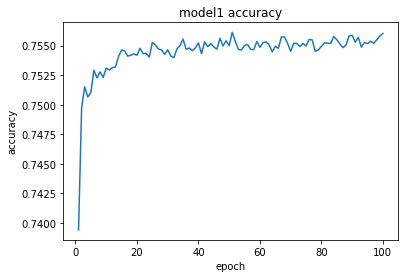

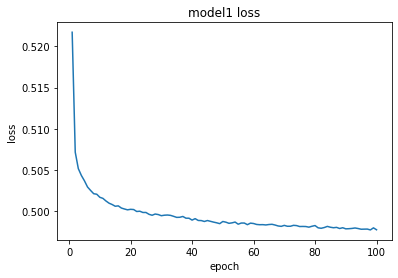

In [35]:


sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model1 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model1 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [36]:
# Let's create a keras sequential model
model2 = Sequential()

# # Let's add dense layer to the model network
model2.add(Dense(32, input_dim=data_frame.shape[1] - 1, activation="relu"))
model2.add(Dense(16, activation = "relu"))
model2.add(Dense(8, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

In [37]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [38]:
history2 = model2.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5191 - accuracy: 0.7412
Epoch 2/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5053 - accuracy: 0.7522
Epoch 3/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5035 - accuracy: 0.7514
Epoch 4/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5027 - accuracy: 0.7533
Epoch 5/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5019 - accuracy: 0.7531
Epoch 6/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5016 - accuracy: 0.7529
Epoch 7/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5010 - accuracy: 0.7541
Epoch 8/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5006 - accuracy: 0.7542
Epoch 9/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5004 - accuracy: 0.7541
Epoch 10/100
2210/2210 [==============================] - 6s 3ms/step - l

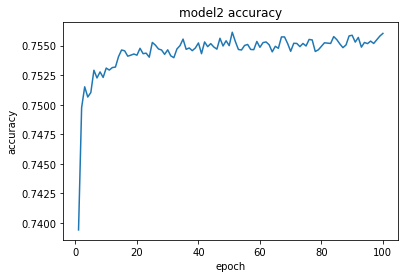

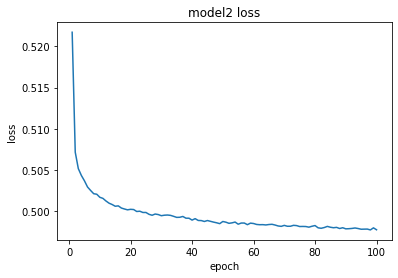

In [39]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model2 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model2 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [40]:
# Let's create a keras sequential model
model3 = Sequential()

# # Let's add dense layer to the model network
model3.add(Dense(32, input_dim=data_frame.shape[1] - 1, activation="relu"))
model3.add(Dense(26, activation = "relu"))
model3.add(Dense(19, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))

In [41]:
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [42]:
history3 = model3.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5167 - accuracy: 0.7436
Epoch 2/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5058 - accuracy: 0.7517
Epoch 3/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5036 - accuracy: 0.7534
Epoch 4/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5026 - accuracy: 0.7531
Epoch 5/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5016 - accuracy: 0.7541
Epoch 6/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5011 - accuracy: 0.7547
Epoch 7/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5005 - accuracy: 0.7548
Epoch 8/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.4999 - accuracy: 0.7542
Epoch 9/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.4996 - accuracy: 0.7552
Epoch 10/100
2210/2210 [==============================] - 6s 3ms/step - l

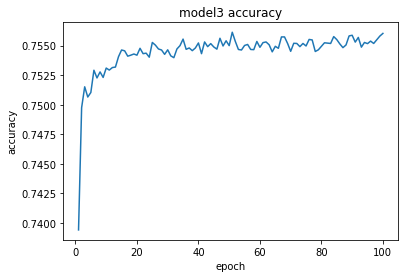

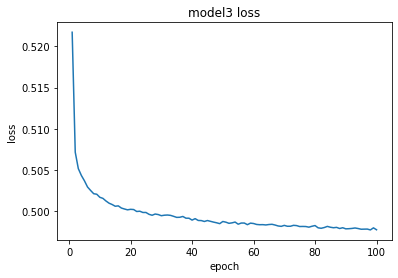

In [43]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model3 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model3 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [44]:
# Let's create a keras sequential model
model4 = Sequential()

# # Let's add dense layer to the model network
model4.add(Dense(64, input_dim=data_frame.shape[1] - 1, activation="relu"))
model4.add(Dense(32, activation = "relu"))
model4.add(Dense(16, activation = "relu"))
model4.add(Dense(14, activation = "relu"))
model4.add(Dense(1, activation = "sigmoid"))

In [45]:
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
history4 = model4.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 8s 3ms/step - loss: 0.5135 - accuracy: 0.7461
Epoch 2/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5047 - accuracy: 0.7517
Epoch 3/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5030 - accuracy: 0.7532
Epoch 4/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5017 - accuracy: 0.7529
Epoch 5/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5011 - accuracy: 0.7543
Epoch 6/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5003 - accuracy: 0.7538
Epoch 7/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.4998 - accuracy: 0.7554
Epoch 8/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.4990 - accuracy: 0.7551
Epoch 9/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.4984 - accuracy: 0.7564
Epoch 10/100
2210/2210 [==============================] - 6s 3ms/step - l

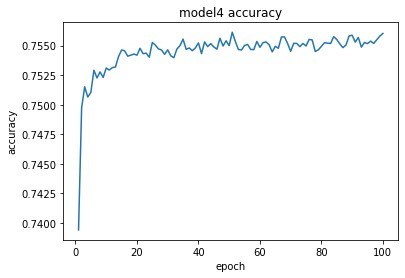

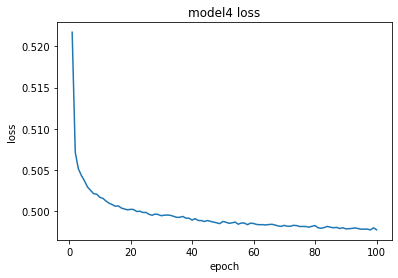

In [47]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model4 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model4 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [48]:
# Let's create a keras sequential model
model5 = Sequential()

# # Let's add dense layer to the model network
model5.add(Dense(92, input_dim=data_frame.shape[1] - 1, activation="relu"))
model5.add(Dense(76, activation = "relu"))
model5.add(Dense(52, activation = "relu"))
model5.add(Dense(48, activation = "relu"))
model5.add(Dense(1, activation = "sigmoid"))

In [49]:
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
history5 = model5.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 8s 3ms/step - loss: 0.5121 - accuracy: 0.7473
Epoch 2/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5057 - accuracy: 0.7519
Epoch 3/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5037 - accuracy: 0.7536
Epoch 4/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5021 - accuracy: 0.7545
Epoch 5/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5011 - accuracy: 0.7550
Epoch 6/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5002 - accuracy: 0.7547
Epoch 7/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.4992 - accuracy: 0.7563
Epoch 8/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.4981 - accuracy: 0.7568
Epoch 9/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.4968 - accuracy: 0.7578
Epoch 10/100
2210/2210 [==============================] - 6s 3ms/step - l

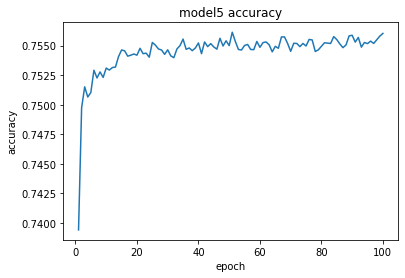

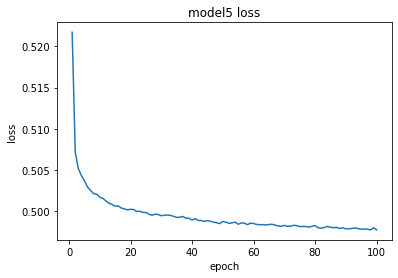

In [51]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model5 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model5 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# # Let's create a keras sequential model
# model6 = Sequential()

# # # Let's add dense layer to the model network
# model6.add(Dense(100, input_dim=data_frame.shape[1] - 1, activation="relu"))
# model6.add(Dense(80, activation = "relu"))
# model6.add(Dense(60, activation = "relu"))
# model6.add(Dense(40, activation = "relu"))
# model6.add(Dense(20, activation = "relu"))
# model6.add(Dense(1, activation = "sigmoid"))

In [ ]:
# model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# history6 = model.fit(x_data, y_data, epochs=100, verbose=1)

In [ ]:
# sns.lineplot(x=x, y=history1.history['accuracy'])
# plt.title('model6 accuracy')
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.show()

# sns.lineplot(x=x, y=history1.history['loss'])
# plt.title('model6 loss')
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.show()

In [52]:
model6 = Sequential()

model6.add(Dense(99, input_dim=data_frame.shape[1] - 1, activation="relu"))
model6.add(Dense(80, activation = "relu"))
model6.add(Dense(72, activation = "relu"))
model6.add(Dense(60, activation = "relu"))
model6.add(Dense(48, activation = "relu"))
model6.add(Dense(1, activation = "sigmoid"))

In [53]:
model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
history6 = model6.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 9s 3ms/step - loss: 0.5129 - accuracy: 0.7478
Epoch 2/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5055 - accuracy: 0.7519
Epoch 3/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5037 - accuracy: 0.7523
Epoch 4/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5027 - accuracy: 0.7538
Epoch 5/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5013 - accuracy: 0.7550
Epoch 6/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5004 - accuracy: 0.7560
Epoch 7/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.4991 - accuracy: 0.7560
Epoch 8/100
2210/2210 [==============================] - 4s 2ms/step - loss: 0.4982 - accuracy: 0.7556
Epoch 9/100
2210/2210 [==============================] - 5s 2ms/step - loss: 0.4973 - accuracy: 0.7568
Epoch 10/100
2210/2210 [==============================] - 7s 3ms/step - l

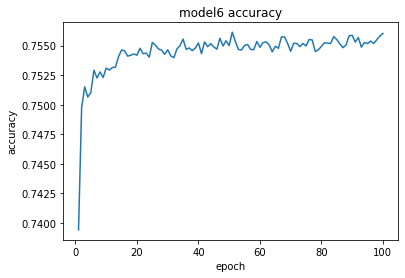

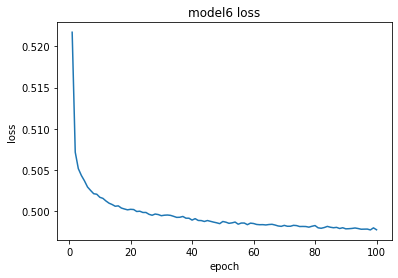

In [55]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model6 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model6 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [33]:
X_DataFrame = data_frame.values
Y_DataFrame = data_frame.iloc[:, -1].values

X_DataFrame.shape

(70692, 18)

In [52]:
model7 = Sequential()

model7.add(Dense(99, input_dim=data_frame.shape[1], activation="relu"))
model7.add(Dense(80, activation = "relu"))
model7.add(Dense(72, activation = "relu"))
model7.add(Dense(60, activation = "relu"))
model7.add(Dense(48, activation = "relu"))
model7.add(Dense(1, activation = "sigmoid"))

In [53]:
model7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
history7 = model7.fit(X_DataFrame, Y_DataFrame, epochs=10, verbose=1)

Epoch 1/10
2210/2210 [==============================] - 5s 2ms/step - loss: 0.0130 - accuracy: 0.9952
Epoch 2/10
2210/2210 [==============================] - 4s 2ms/step - loss: 7.2850e-04 - accuracy: 0.9997
Epoch 3/10
2210/2210 [==============================] - 3s 2ms/step - loss: 2.2691e-06 - accuracy: 1.0000
Epoch 4/10
2210/2210 [==============================] - 3s 1ms/step - loss: 8.8064e-08 - accuracy: 1.0000
Epoch 5/10
2210/2210 [==============================] - 3s 1ms/step - loss: 2.3602e-08 - accuracy: 1.0000
Epoch 6/10
2210/2210 [==============================] - 3s 1ms/step - loss: 1.1231e-08 - accuracy: 1.0000
Epoch 7/10
2210/2210 [==============================] - 3s 1ms/step - loss: 4.7289e-09 - accuracy: 1.0000
Epoch 8/10
2210/2210 [==============================] - 3s 1ms/step - loss: 1.9098e-09 - accuracy: 1.0000
Epoch 9/10
2210/2210 [==============================] - 3s 1ms/step - loss: 8.0998e-10 - accuracy: 1.0000
Epoch 10/10
2210/2210 [===========================

In [56]:
# model7 = Sequential()

# model7.add(Dense(90, input_dim=data_frame.shape[1] - 1, activation="relu"))
# model7.add(Dense(80, activation = "relu"))
# model7.add(Dense(63, activation = "relu"))
# model7.add(Dense(50, activation = "relu"))
# model7.add(Dense(33, activation = "relu"))
# model7.add(Dense(1, activation = "sigmoid"))

In [57]:
# model7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# history7 = model7.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 8s 3ms/step - loss: 0.5127 - accuracy: 0.7471
Epoch 2/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5053 - accuracy: 0.7519
Epoch 3/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5034 - accuracy: 0.7531
Epoch 4/100
2210/2210 [==============================] - 6s 3ms/step - loss: 0.5024 - accuracy: 0.7527
Epoch 5/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5012 - accuracy: 0.7557
Epoch 6/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.5006 - accuracy: 0.7552
Epoch 7/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.4991 - accuracy: 0.7565
Epoch 8/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.4978 - accuracy: 0.7575
Epoch 9/100
2210/2210 [==============================] - 7s 3ms/step - loss: 0.4971 - accuracy: 0.7577
Epoch 10/100
2210/2210 [==============================] - 7s 3ms/step - l

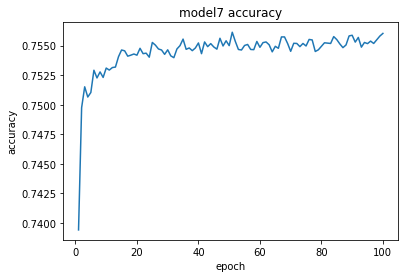

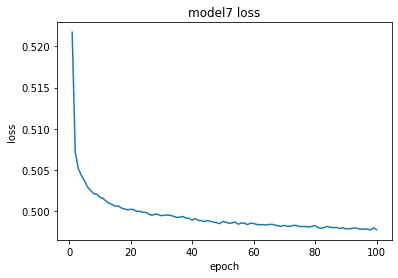

In [59]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model7 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model7 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# model8 = Sequential()

# model8.add(Dense(82, input_dim=data_frame.shape[1] - 1, activation="relu"))
# model8.add(Dense(70, activation = "relu"))
# model8.add(Dense(58, activation = "relu"))
# model8.add(Dense(19, activation = "relu"))
# model8.add(Dense(8, activation = "relu"))
# model8.add(Dense(1, activation = "sigmoid"))

In [ ]:
# model8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# history8 = model8.fit(x_data, y_data, epochs=100, verbose=1)

In [60]:
model8 = Sequential()

model8.add(Dense(68, input_dim=data_frame.shape[1] - 1, activation="relu"))
model8.add(Dense(56, activation = "relu"))
model8.add(Dense(48, activation = "relu"))
model8.add(Dense(32, activation = "relu"))
model8.add(Dense(22, activation = "relu"))
model8.add(Dense(1, activation = "sigmoid"))

In [61]:
model8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
history8 = model8.fit(x_data, y_data, epochs=100, verbose=1)


Epoch 1/100
2210/2210 [==============================] - 4s 1ms/step - loss: 0.5135 - accuracy: 0.7463
Epoch 2/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5057 - accuracy: 0.7511
Epoch 3/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5039 - accuracy: 0.7538
Epoch 4/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5027 - accuracy: 0.7523
Epoch 5/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5016 - accuracy: 0.7545
Epoch 6/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5008 - accuracy: 0.7541
Epoch 7/100
2210/2210 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.7561
Epoch 8/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.4984 - accuracy: 0.7566
Epoch 9/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.4972 - accuracy: 0.7572
Epoch 10/100
2210/2210 [==============================] - 3s 1ms/step - l

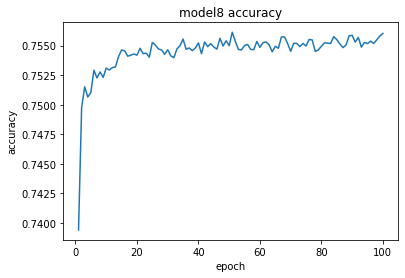

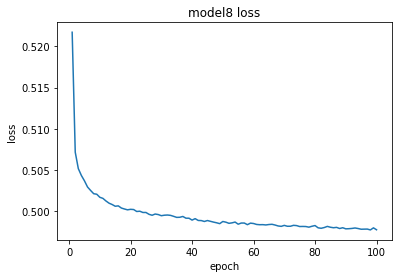

In [63]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model8 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model8 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [64]:
model9 = Sequential()
model9.add(Dense(88, input_dim=data_frame.shape[1] - 1, activation="relu"))
model9.add(Dense(62, activation = "relu"))
model9.add(Dense(40, activation = "relu"))
model9.add(Dense(26, activation = "relu"))
model9.add(Dense(10, activation = "relu"))
model9.add(Dense(1, activation = "sigmoid"))

In [65]:
model9.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [66]:
history9 = model9.fit(x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
2210/2210 [==============================] - 4s 1ms/step - loss: 0.5140 - accuracy: 0.7456
Epoch 2/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5050 - accuracy: 0.7518
Epoch 3/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5033 - accuracy: 0.7532
Epoch 4/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5023 - accuracy: 0.7539
Epoch 5/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5013 - accuracy: 0.7531
Epoch 6/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.5007 - accuracy: 0.7540
Epoch 7/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.4996 - accuracy: 0.7560
Epoch 8/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.4989 - accuracy: 0.7559
Epoch 9/100
2210/2210 [==============================] - 3s 1ms/step - loss: 0.4980 - accuracy: 0.7566
Epoch 10/100
2210/2210 [==============================] - 3s 1ms/step - l

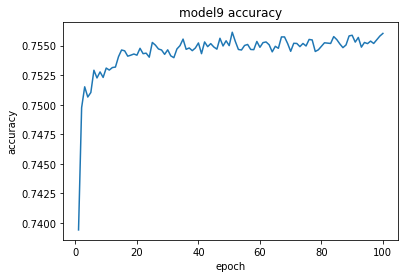

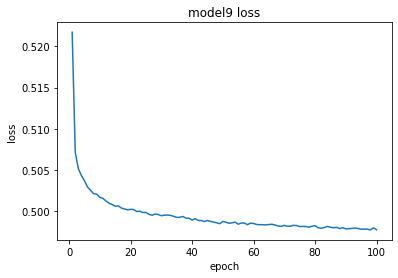

In [67]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model9 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model9 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model10 = Sequential()

model10.add(Dense(90, input_dim=data_frame.shape[1] - 1, activation="relu"))
model10.add(Dense(50, activation = "relu"))
model10.add(Dense(40, activation = "relu"))
model10.add(Dense(30, activation = "relu"))
model10.add(Dense(20, activation = "relu"))
model10.add(Dense(1, activation = "sigmoid"))

In [ ]:
model10.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history10 = model10.fit(x_data, y_data, epochs=100, verbose=1)

In [ ]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model10 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model10 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model11 = Sequential()

model11.add(Dense(82, input_dim=data_frame.shape[1] - 1, activation="relu"))
model11.add(Dense(70, activation = "relu"))
model11.add(Dense(58, activation = "relu"))
model11.add(Dense(19, activation = "relu"))
model11.add(Dense(8, activation = "relu"))
model11.add(Dense(1, activation = "sigmoid"))

In [ ]:
model11.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history11 = model11.fit(x_data, y_data, epochs=100, verbose=1)

In [ ]:
sns.lineplot(x=x, y=history1.history['accuracy'])
plt.title('model11 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sns.lineplot(x=x, y=history1.history['loss'])
plt.title('model1 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [55]:
data_frame = data_frame.sample(frac=1).reset_index(drop=True)

In [56]:
index_30percent = int(0.3 * len(data_frame.iloc[:, 0].values))
print(index_30percent)

XVALIDATION = data_frame.iloc[:index_30percent, :-1].values
YVALIDATION = data_frame.iloc[:index_30percent, -1].values

XTRAIN = data_frame.iloc[index_30percent:, 0:-1].values
YTRAIN = data_frame.iloc[index_30percent:, -1].values

21207


In [62]:
training_model = Sequential()

training_model.add(Dense(1, input_dim=XTRAIN.shape[1], activation = "relu"))

In [63]:
training_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [64]:
history12 = training_model.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1519/1547 [============================>.] - ETA: 0s - loss: 5.6035 - accuracy: 0.4963
Epoch 1: val_loss improved from inf to 4.84060, saving model to best_model.hdf5
1547/1547 [==============================] - 4s 2ms/step - loss: 5.5869 - accuracy: 0.4973 - val_loss: 4.8406 - val_accuracy: 0.5508
Epoch 2/100
1524/1547 [============================>.] - ETA: 0s - loss: 4.2033 - accuracy: 0.5872
Epoch 2: val_loss improved from 4.84060 to 4.02903, saving model to best_model.hdf5
1547/1547 [==============================] - 3s 2ms/step - loss: 4.1975 - accuracy: 0.5878 - val_loss: 4.0290 - val_accuracy: 0.6089
Epoch 3/100
1530/1547 [============================>.] - ETA: 0s - loss: 3.6976 - accuracy: 0.6232
Epoch 3: val_loss improved from 4.02903 to 3.69051, saving model to best_model.hdf5
1547/1547 [==============================] - 3s 2ms/step - loss: 3.6975 - accuracy: 0.6230 - val_loss: 3.6905 - val_accuracy: 0.6184
Epoch 4/100
1544/1547 [============================>.] -